In [ ]:
## 기본적인 Jypiter 사용법

### 단축키
- Enter // Ctrl+m
- Shift + Enter
- Ctrl + Enter = 실행하고 그대로
- dd / c / x / p / a / b
- m (markdown) // y (code)
- shift + m (합치기)
- ctrl + shift + - (분리하기)
- ctrl + /

In [7]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

mnist = keras.datasets.fashion_mnist
type(mnist) 
(X_train, y_train), (X_test, y_test) = mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,))

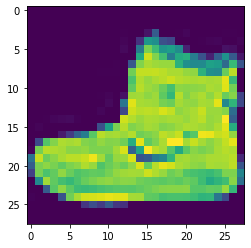

In [8]:
class_name = ['top', 'trouser', 'pullover', 'dress', 'coat', 'sendal', 'shirt', 'sneaker', 'bag', 'ankle boot']
plt.figure()
plt.imshow(X_train[0])
X_train = X_train/255.0
X_test = X_test/255.0

In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(28, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.summary()

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.fit(X_train, y_train, epochs = 10)

test_loss, test_acc = model.evaluate(X_test, y_test)
print(test_loss)
print(test_acc)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 28)                21980     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                290       
Total params: 22,270
Trainable params: 22,270
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 1s 749us/step - loss: 0.5682 - accuracy: 0.8044
Epoch 2/10
1875/1875 [==============================] - 1s 692us/step - loss: 0.4351 - accuracy: 0.8498
Epoch 3/10
1875/1875 [==============================] - 1s 688us/step - loss: 0.4053 - accuracy: 0.8584
Epoch 4/10
1875/1875 [==============================] - 1s 683us/ste

In [11]:
from sklearn.metrics import accuracy_score
y_pred = model.predict_classes(X_test)
accuracy_score(y_test, y_pred)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


0.8624